#**Synapse Week Two**

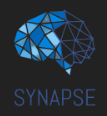

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding. Enough chitchat, lets get to work :P

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

OPTIONAL BUT USEFUL <br>
Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [ ]:
!pip install shap -q  #Will be used later on

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mount your Google Drive using the cell below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Regression

For regression, lets reuse the crab dataset that you worked on last week. Import the dataset from wherever you had saved it in the cell below.
Also print the first 5 rows to ensure you have loaded the dataset correctly.

In [ ]:
df_crab = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
df_crab.head()


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [ ]:
df_crab.shape

(74051, 10)

Now, let's some employ some Feature Engineering tactics which you would have performed in the previous tasks.

Create a function called crab_processing which takes a dataframe as an input, performs the following tasks, and returns a cleaned and edited df:

1) Drop the 'id' column.

2) Drop all rows where 'Height' of the crab is 0.

3) Create a new column called 'LostWeight' which is calculated using the following formula - ```
Weight - (Shucked + Viscera + Shell)``` .
If this formula gives a number less than 0, then assign 0 to the LostWeight column, else assign 1.

4) Finally, use one hot encoding to encode the column 'Sex'

Take help from your previous task where you have implemented these steps in different cells.


In [ ]:
import pandas as pd

def crab_processing(df):
    # Drop the 'id' column if it exists
    if 'id' in df.columns:
        df.drop(['id'], axis='columns', inplace=True)

    # Remove rows where 'Height' is less than or equal to 0 using boolean indexing
    df = df[df['Height'] > 0]

    # Calculate the 'Lost Weight' and append to a list
    lostWeight = []
    for index, row in df.iterrows():
        if row["Weight"] - row["Shucked Weight"] - row["Viscera Weight"] - row["Shell Weight"] >= 0:
            lostWeight.append(1)
        else:
            lostWeight.append(0)

    # Insert 'Lost Weight' column at the end
    df['Lost Weight'] = lostWeight

    # Convert categorical 'Sex' column to dummy variables
    df = pd.get_dummies(df, columns=["Sex"])

    return df

# Assuming df_crab is the DataFrame to be processed
df_crab = crab_processing(df_crab)
df_crab.head()



<ipython-input-8-ebef6e6fc72b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lost Weight'] = lostWeight


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Lost Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,1,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,1,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,1,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,1,False,True,False


If all is correct, this should be the shape of your df now.

In [ ]:
df_crab.shape

(74027, 12)

###Basic Visualization

In this problem, our aim is to predict the age of the crab, hence 'Age' here is called our target variable. To check its distribution, plot a histogram of the 'Age' column.

Choose the number of bins by experimenting. The output is expected to mimic a bell curve.

What is a histogram? - https://www.w3schools.com/python/matplotlib_histograms.asp

Difference between histogram and a bar graph - https://keydifferences.com/difference-between-histogram-and-bar-graph.html

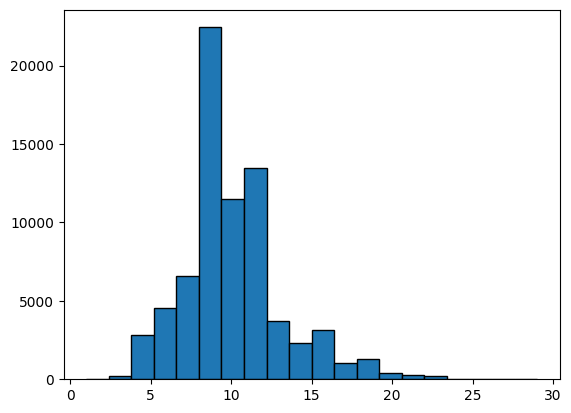

In [ ]:
plt.hist(df_crab['Age'],bins=20,edgecolor='black')
plt.show()

###Feature and Variable Sets

As mentioned above, the 'Age' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'Age') and one which only contains the column 'Age'. Name them X and y respectively.

In [ ]:
X = pd.DataFrame(df_crab.drop(['Age'],axis=1))
y = df_crab['Age']

In [ ]:
# This code should print (74027, 11) and (74027, 1) if everything is correct
print(X.shape,y.shape)

(74027, 11) (74027,)


In [ ]:
X.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,False,True,False


In [ ]:
y.head()

0     9
1     8
2     9
3    11
4     8
Name: Age, dtype: int64

###Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split


**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(51818, 11) (22209, 11) (51818,) (22209,)


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

###Model fit and training

Here is the complete lowdown on SVM (Support Vector Machine):<br>
Theory : https://youtu.be/H9yACitf-KM <br>
Theory: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ <br>
Implementation : https://youtu.be/FB5EdxAGxQg

Import SVR (Support Vector Regressor) and its metrics from scikit-learn.

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

svr = SVR()

Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable.

Hint: svr.fit()

This might take about a minute or so, just to inform you.

In [ ]:
svr.fit(X_train,y_train)

SVR()

###Prediction, error estimate, and regression evaluation matrices

**Prediction using the svr model**

The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

Use svr.predict() on X_test and store it in a variable called "predictions". Print type and size of the predictions.

Size should be (22009,) if everything is correct.

In [ ]:
predictions=svr.predict(X_test)
print(type(predictions),predictions.size)

<class 'numpy.ndarray'> 22209


Now that we have our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data falls on a 45 degree straight line

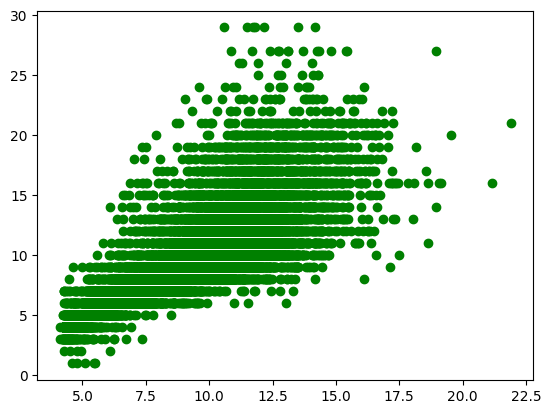

In [ ]:
plt.scatter(predictions,y_test,color='green')
plt.show()

As you can see, it's not perfect, but you can definitely visualize the data lining up at a 45 degree angle.

**Model Evaluation**

We will be exploring the most common regression metric here namely R2 score. You can check out more metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Here's a video detailing all the popular regression metrics - https://www.youtube.com/watch?v=Ti7c-Hz7GSM

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [ ]:
print(round(r2_score(y_test,predictions),3))

0.557


In the cell below, explain what the above score means and also elaborate how 'good' is the score in terms of evaluation of the model

Your text here




In [ ]:
print(mean_squared_error(y_test,predictions))
print(mean_absolute_error(y_test,predictions))


4.512618250616919
1.3941146466759016


You have succesfully implemented Support Vector Regressor to predict Age of a crab. But is this the only regression model out there? In the cell below, list down 3 more regression models with a basic explanation of how they work. Also include a line explaining in which scenario each model works best.

Your text here

###OPTIONAL: Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [ ]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

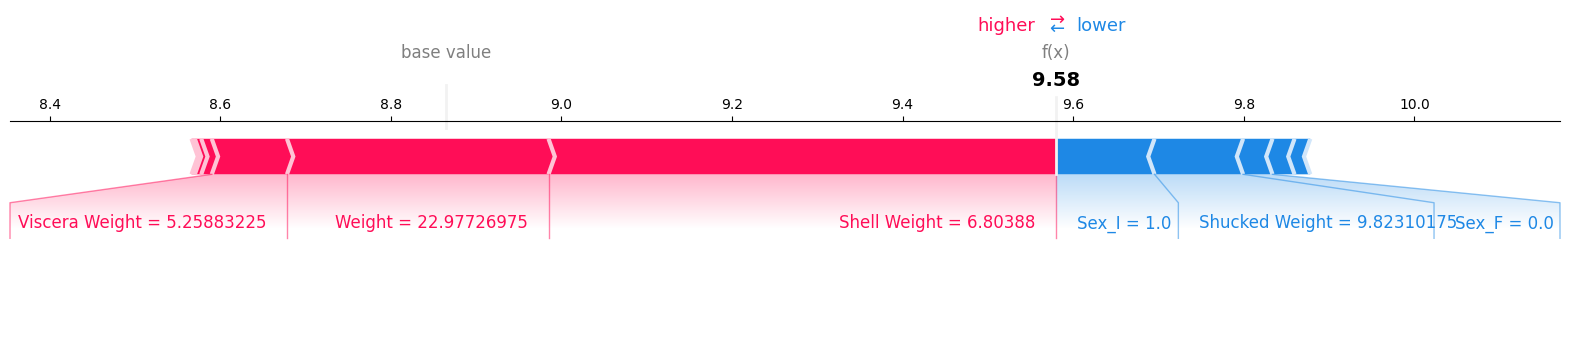

In [ ]:
#Run this code as it is
ex = KernelExplainer(svr.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

##Classification

In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/classified_data.txt',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

###Basic EDA

In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

Here is some information about boxplots:

Understanding Boxplots:
https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 <br>
Comparing two boxplots: https://www.nagwa.com/en/explainers/812192146073/

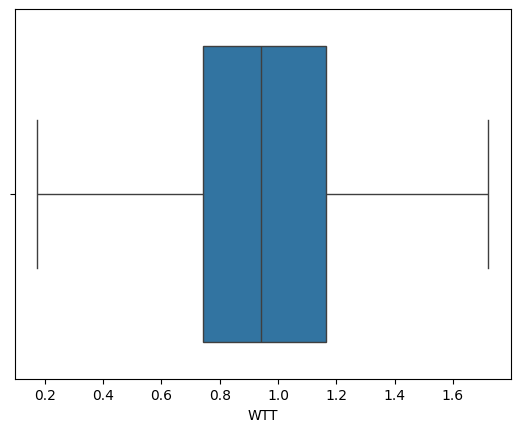

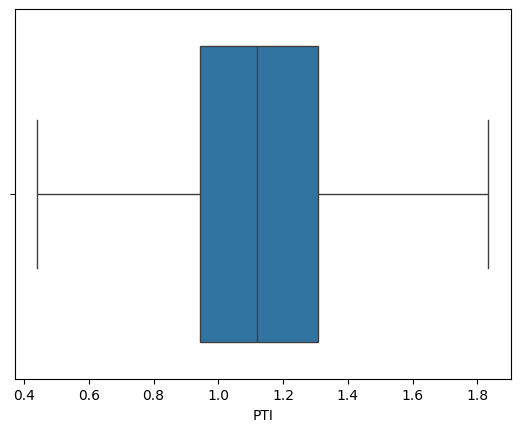

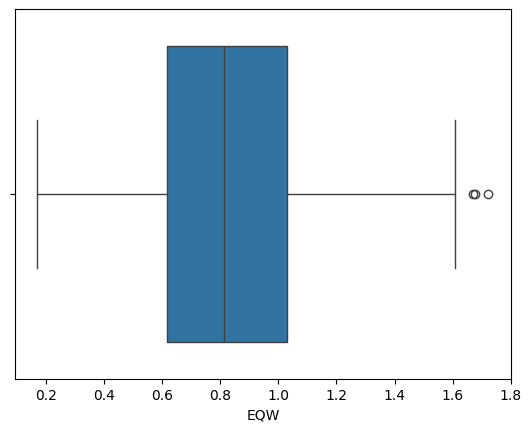

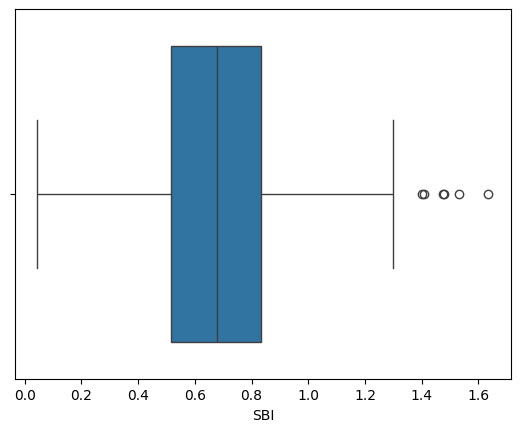

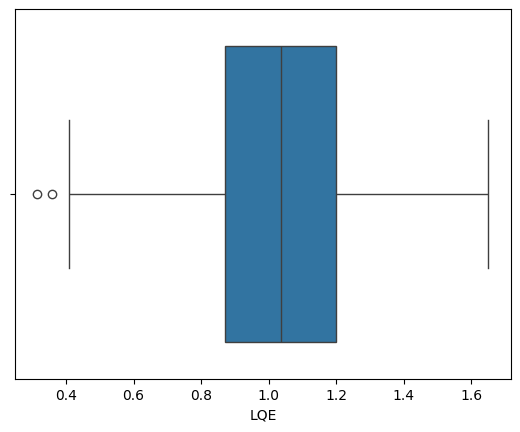

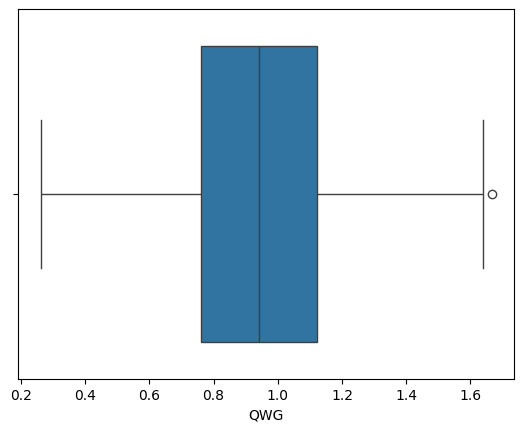

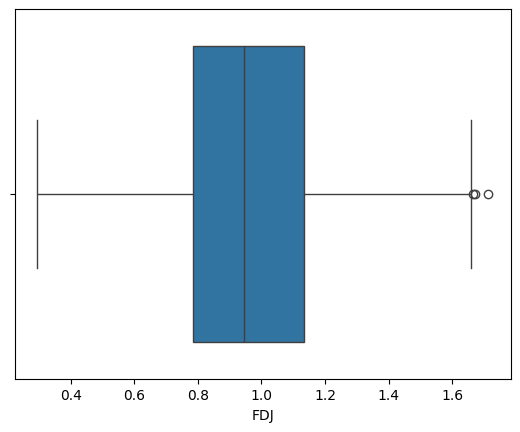

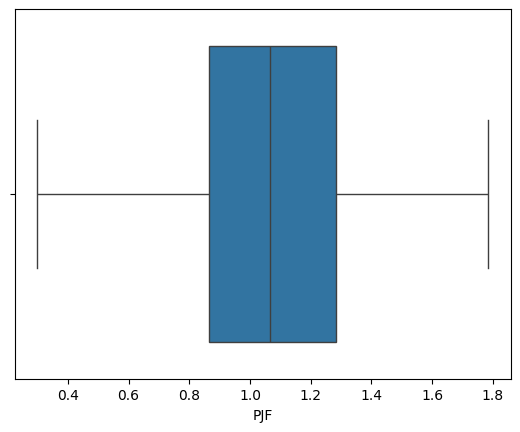

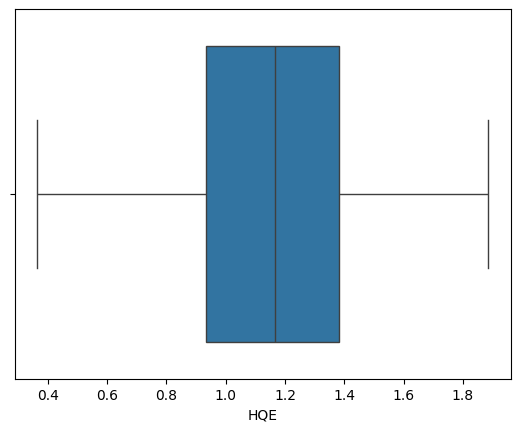

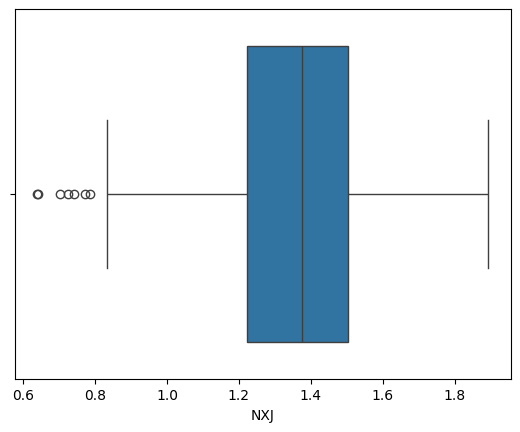

In [ ]:
for col in df.columns:
  if(col!='TARGET CLASS'):
    sns.boxplot(x=df[col])
    plt.show()


What conclusion, if any can you draw from these boxplots?
List them down below.

Text here

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [ ]:
df_features=df.drop('TARGET CLASS',axis=1)
scaler.fit(df_features)
arr_trans = scaler.transform(df_features)
print(arr_trans)

[[-0.12354188  0.18590747 -0.91343069 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.08483602 -0.43034845 -1.02531333 ... -0.20224031 -1.82805088
   0.63675862]
 [-0.78870217  0.33931821  0.30151137 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 0.64177714 -0.51308341 -0.17920486 ... -2.36249443 -0.81426092
   0.11159651]
 [ 0.46707241 -0.98278576 -1.46519359 ... -0.03677699  0.40602453
  -0.85567   ]
 [-0.38765353 -0.59589427 -1.4313981  ... -0.56778932  0.3369971
   0.01034996]]


**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [ ]:
df_feat=pd.DataFrame(arr_trans,columns=df_features.columns)
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [ ]:
X = df_feat
y = pd.DataFrame(df['TARGET CLASS'])

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [ ]:
pred=neigh.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred,target_names=['y_test','pred']))

              precision    recall  f1-score   support

      y_test       0.93      0.89      0.91       146
        pred       0.90      0.94      0.92       154

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [ ]:
# Your code starts here.
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
print(round(acc,3))
# Your code ends here

0.913


Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [ ]:
accuracy_list = []
for i in range(1,61):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, pred))
print(accuracy_list)
print(accuracy_list.index(max(accuracy_list))+1)

[0.9133333333333333, 0.9266666666666666, 0.9366666666666666, 0.9433333333333334, 0.9366666666666666, 0.9433333333333334, 0.9366666666666666, 0.94, 0.9366666666666666, 0.9466666666666667, 0.9433333333333334, 0.94, 0.94, 0.9466666666666667, 0.9466666666666667, 0.9433333333333334, 0.9433333333333334, 0.9433333333333334, 0.9433333333333334, 0.94, 0.9433333333333334, 0.9433333333333334, 0.94, 0.9433333333333334, 0.9433333333333334, 0.9466666666666667, 0.9433333333333334, 0.95, 0.9533333333333334, 0.9566666666666667, 0.95, 0.9533333333333334, 0.9466666666666667, 0.9533333333333334, 0.95, 0.96, 0.95, 0.9533333333333334, 0.95, 0.9566666666666667, 0.9566666666666667, 0.9566666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9566666666666667, 0.9533333333333334, 0.9533333333333334, 0.9566666666666667, 0.9566666666666667, 0.9533333333333334, 0.9533333333333334, 0.95, 0.9566666666666667, 0.9533333333333334, 0.9566666666666667, 0.95333

**Plot a graph of K value vs Accuracy**

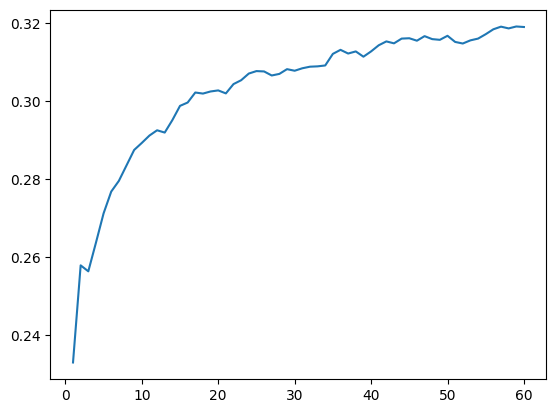

In [ ]:
k_val = []
for i in range(1,61):
  k_val.append(i)

plt.plot(k_val,acc_list)
plt.show()

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [89]:
# Your code starts here.
n_acc_best = max(acc_list)
n_neigh_best = acc_list.index(n_acc_best)
print("Best value of n_neighbours:",n_neigh_best)
print("Corresponding highest accuracy:",n_acc_best)
# Your code ends here

Best value of n_neighbours: 58
Corresponding highest accuracy: 0.3191498941870413


# **End of Task**



